In [274]:
import pandas as pd
import numpy as np
data=pd.Series([1,np.nan,'hello',None]) # None : 초기화 되지 않음을 표현, nan= not an number
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [275]:
data.isnull().sum()

2

In [276]:
data[data.notnull()]        # boolean index,  notnull의 인덱스와 값

0        1
2    hello
dtype: object

In [277]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [278]:
data=data.dropna()

In [279]:
data

0        1
2    hello
dtype: object

In [ ]:
# 시리즈에만 적용되는 명령: map, value_counts, augmin, augmax, astype,
# isin 포함여부 확인

In [280]:
df=pd.DataFrame([[1,    np.nan,     2],
                 [2,     3,         5],
                 [np.nan,4         ,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [281]:
df.dropna(axis='columns')   # 축을 지정, axis=0 , 열은 주의해서 사용해야함

,2
0,2
1,5
2,6


In [283]:
df.dropna(axis='columns',how='all') # 전체 na인것만 삭제

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [285]:
df.fillna(0)        # na를 (넣은 값)으로 채움

,0,1,2
0,1.0,5.0,2
1,2.0,3.0,5
2,5.0,4.0,6


In [286]:
df.fillna(method='bfill')   # 디폴트는 열   ,

,0,1,2
0,1.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6


In [11]:
df.fillna(method='ffill',axis=1) # 행을기준

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


In [ ]:
#!pip install missingno

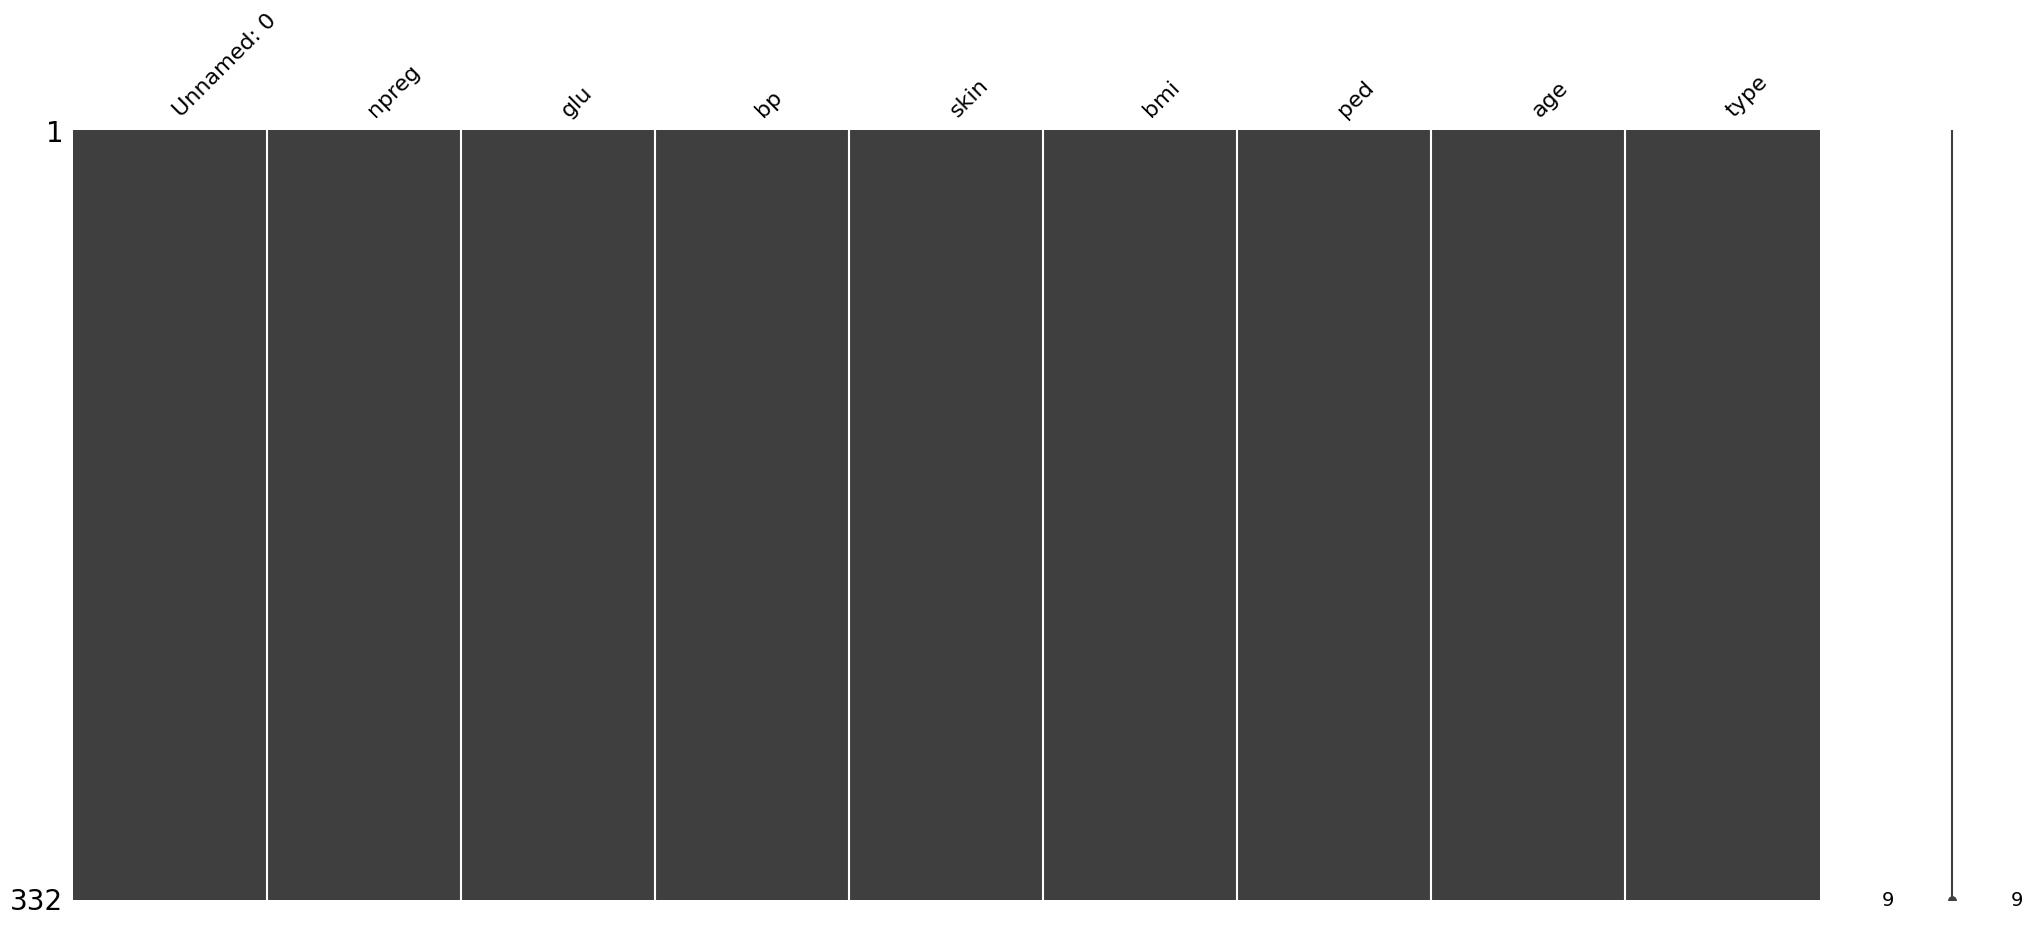

In [31]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/daejeon/pima.csv')
msno.matrix(df)
plt.show()

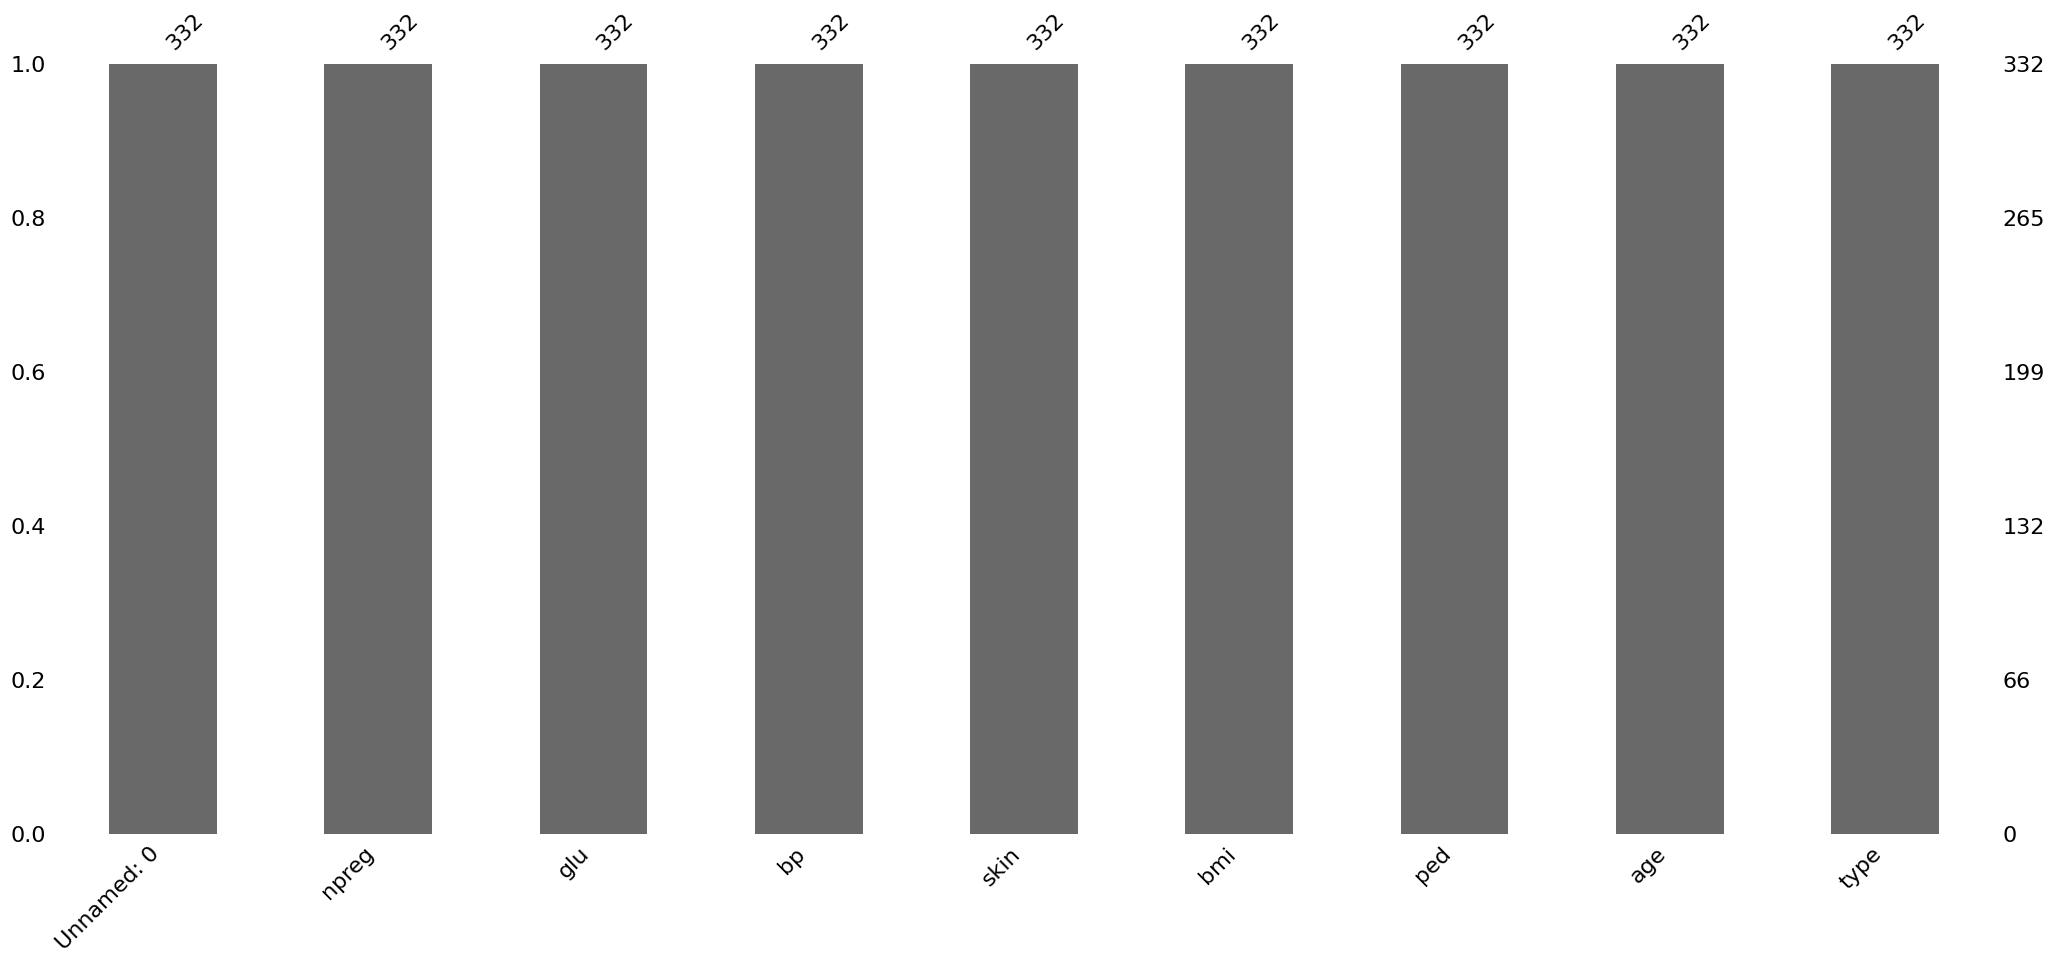

In [32]:
msno.bar(df)
plt.show()

In [34]:
df.to_csv('/content/drive/MyDrive/daejeon/pima_bak.csv',index=False)

In [35]:
df.dropna().shape   # shape 결과에 대한 모양

(332, 9)

In [36]:
df.describe()

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,166.500000,3.484940,119.259036,71.653614,29.162651,33.239759,0.528389,31.316265
std,95.984374,3.283634,30.501138,12.799307,9.748068,7.282901,0.363278,10.636225
min,1.000000,0.000000,65.000000,24.000000,7.000000,19.400000,0.085000,21.000000
25%,83.750000,1.000000,96.000000,64.000000,22.000000,28.175000,0.266000,23.000000
50%,166.500000,2.000000,112.000000,72.000000,29.000000,32.900000,0.440000,27.000000
75%,249.250000,5.000000,136.250000,80.000000,36.000000,37.200000,0.679250,37.000000
max,332.000000,17.000000,197.000000,110.000000,63.000000,67.100000,2.420000,81.000000


In [37]:
df.head(5)

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [ ]:
#df[[1,2,3,4,5]]

In [ ]:
#df[[1,2,3,4,5]]=df[[1,2,3,4,5]].replace(0,np.NaN)

In [287]:
# SimpleImputer <-결측치 처리 객체
# 데이터 전처리 할 때 기본: 열제거X(특별한 경우가 아니면 지우지 않고 채움)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')    # strategy='mean' 채우는 방법, median, most_frequent(자주 나오는 거), constant(상수)
imp.fit([[1,2,3],[np.nan,3,3],[7,6,3]]) # 데이터에 적합하도록 학습
X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp.transform(X)) # 적용
print(X)

[[ 4.          2.          3.        ]
 [ 4.          3.66666667  6.        ]
 [10.          3.66666667  9.        ]]
[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]


In [289]:
# 정규분포
from scipy import stats
df=pd.DataFrame({'key':[1,1,1,1,1000,1,1,1,1],'data1':[1,1,1,1,1,1,1,1,20000]})
df

,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
4,1000,1
5,1,1
6,1,1
7,1,1
8,1,20000


In [48]:
z_scores=stats.zscore(df)   # z점수 정규화: 평균을 0으로 표준편차를 1로해서 졍규화
print(z_scores)
abs_z_scores=np.abs(z_scores)   # 절대값으로 표현
# 이상치 처리, 2로하면 이상치 확인되어 처리, 2.5 나 3이  보통 기준 (z점수 이상치 제거)
filtered_entries=(abs_z_scores<3).all(axis=1)
new_df=df[filtered_entries]
new_df

        key     data1
0 -0.353553 -0.353553
1 -0.353553 -0.353553
2 -0.353553 -0.353553
3 -0.353553 -0.353553
4  2.828427 -0.353553
5 -0.353553 -0.353553
6 -0.353553 -0.353553
7 -0.353553 -0.353553
8 -0.353553  2.828427


,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
4,1000,1
5,1,1
6,1,1
7,1,1
8,1,20000


In [50]:
# 사분위수 이상치 제거
df=pd.DataFrame({'Data':np.random.normal(size=200)})
print(df.describe())
# IQR(inter quantile range)
# 상한치= quantile(0.75) + 1.5*IQR
# 하한치 = quantile(0.25)-1.5*IQR
q_low=df.iloc[:,0].quantile(0.01)
q_hi=df.iloc[:,0].quantile(0.99)
print("하한값",q_low)
print("상한값",q_hi)

df_filtered=df[(df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low)]
print("정상데이터",len(df_filtered))
df_filtered.head()

             Data
count  200.000000
mean     0.048054
std      0.932969
min     -2.762783
25%     -0.651676
50%     -0.017068
75%      0.678678
max      3.074774
하한값 -1.9742049783018902
상한값 2.033411632090062
정상데이터 196


,Data
0,-0.753877
1,-0.471324
2,-0.483452
3,0.576042
4,-0.994012


In [57]:
# 비정상데이터를 출력해보시오
# df_non=df[(df.iloc[:,0]>=q_hi)|(df.iloc[:,0]<=q_low)]
# print("비정상데이터",len(df_non))
df_filtered=df[~((df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low))] #단항연산 부정
print("정상데이터",len(df_filtered))

정상데이터 4


In [ ]:
# 문제) 정상적으로 IQR을 구하고 상한치와 하한치를 구한다음에 이상치 제거를 해보시오
#   percentile(75),quantile(0.75)
IQR=df.iloc[:,0].quantile(0.75)-df.iloc[:,0].quantile(0.25)
q_hi=df.iloc[:,0].quantile(0.75)+1.5*IQR
q_low=df.iloc[:,0].quantile(0.25)-1.5*IQR
print("상한값",q_hi)
print('하한값',q_low)
df_filtered=df[(df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low)]
print("정상데이터",len(df_filtered))

In [65]:
# robust 정규화
# (data-median())/IQR

# min-max 정규화
#(data-mean)/(max-min)

IQR=df.iloc[:,0].quantile(0.75)-df.iloc[:,0].quantile(0.25)
(df-df.median())/IQR

,Data
0,-0.553845
1,-0.341456
2,-0.350572
3,0.445828
4,-0.734350
...,...
195,0.189049
196,-0.584248
197,1.024273
198,-0.041529


In [66]:
# 구간범주화 (cut/qcut)
df=pd.DataFrame({'value':np.random.randint(0,100,20)})
print(df.shape)
labels=["{0}-{1}".format(i,i+9) for i in range(0,100,10)]
print(labels)
df['group']=pd.qcut(df.value,10, labels=labels) # 등분
df.head(20)

(20, 1)
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


,value,group
0,91,90-99
1,57,60-69
2,4,0-9
3,20,30-39
4,34,40-49
5,4,0-9
6,27,30-39
7,14,10-19
8,19,20-29
9,72,70-79


In [67]:
df.groupby('group').count() # df.groupby('group'). ~ 집계함수

,value
group,
0-9,2
10-19,3
20-29,1
30-39,2
40-49,2
50-59,2
60-69,2
70-79,2
80-89,2


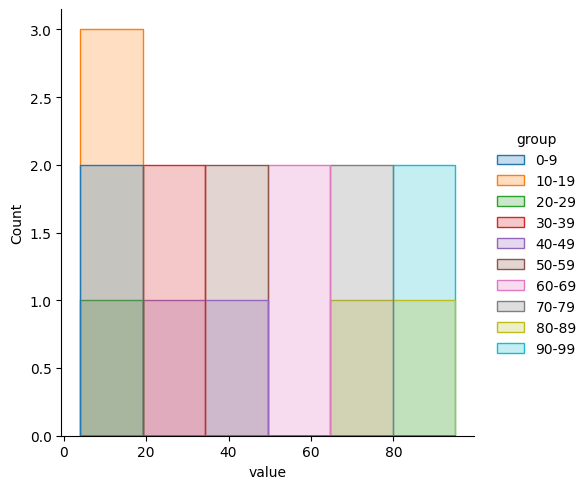

In [74]:
# figure level(여러개의 화면, 축) vs axes level(단일 화면)
# histplot(디폴트), kdeplot, ecdfplot
# kind 에 따라서 매칭되는 속성이 다를 수 있음
import seaborn as sns
#sns.displot(df , x='value', hue='group',,kind='kde')
sns.displot(df , x='value', hue='group', element='step',kind='hist')
# kind 의 디폴트는 hist

# ::추세, 구성, 분포, 비교 : EDA
시각화 해서 하고싶은 것들

<ipython-input-76-ffd47d2a62b0>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df , x='value', hue='group',kind='kde')
<ipython-input-76-ffd47d2a62b0>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df , x='value', hue='group',kind='kde')


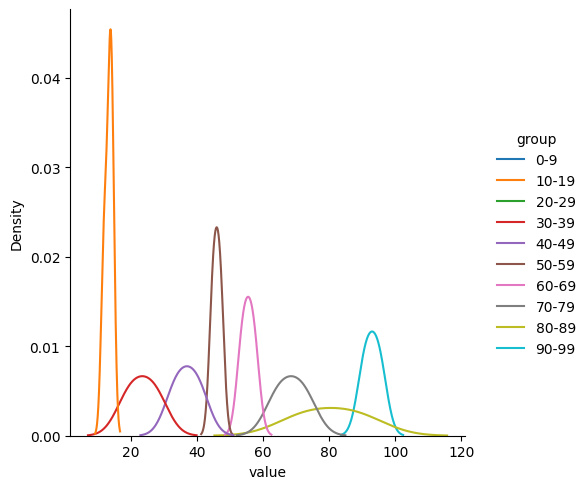

In [76]:
sns.displot(df , x='value', hue='group',kind='kde') # 분포와 비교

In [78]:
# 범주화
s= pd.Series(['a','b','c','a'],dtype='category')
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [290]:
df=pd.DataFrame({'A':['a','b','c','a'],'C':[10,20,30,40]})
df['B']=df["A"].astype('category')
df

,A,C,B
0,a,10,a
1,b,20,b
2,c,30,c
3,a,40,a


0.12.2


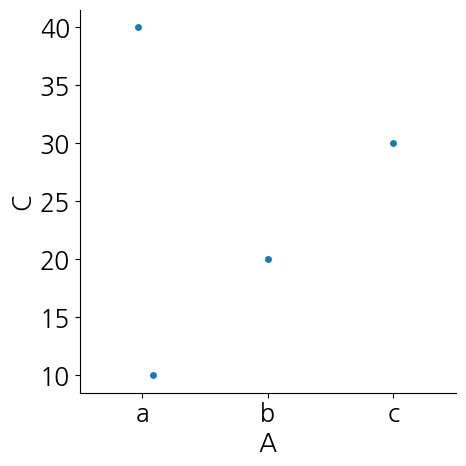

In [291]:
# 문자열을 시각화
print(sns.__version__)
sns.catplot(x="A",y="C",data=df)    #catplot=categotical plot
plt.show()

In [292]:
# np.nan 을 -1로 factor화
values=np.array([1,2,1,np.nan])
codes, uniques=pd.factorize(values)
print(codes)
print(uniques)      # label 수,종류
print(values)

[ 0  1  0 -1]
[1. 2.]
[ 1.  2.  1. nan]


In [88]:
# get_dummies = 원핫인코딩:범주형 데이터를 수치
# long->wide 하게표현
df=pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
print(df)
# 범주형 변수를 정규화 <- 분석할 때 사용
print(pd.get_dummies(df['key'],prefix='key'))    # key 열을 중심하고 원핫인코딩,,,prefix='key'접두사 (어디서 나온지 알려줌)
# 변수의 종류를 하나의 범주 취급(wide)
dummies=pd.get_dummies(df['key'],prefix='key')

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0


In [89]:
df_with_dummy=df[['data1']].join(dummies)   # 원래의 데이터와 합쳐줌
print(df_with_dummy)

   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [90]:
df=pd.read_csv('/content/drive/MyDrive/daejeon/cust_mast.csv')
df.shape

(5000, 8)

In [91]:
df.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [92]:
df_nunique=df.nunique()     # 열의 고유값 확인  , df나 시리즈
df_nunique

customer_id          5000
customer_name        5000
registration_date    4951
email                5000
gender                  2
age                    61
birth                4464
pref                    7
dtype: int64

In [93]:
df.dtypes

customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
dtype: object

In [95]:
df['customer_name'].value_counts()  # <- 주로 시리즈

김서준     1
최서온     1
최규하     1
최상엽     1
최서완     1
       ..
이에스더    1
이하이     1
이린아     1
이보윤     1
정지석     1
Name: customer_name, Length: 5000, dtype: int64

In [96]:
df['pref'].value_counts(normalize=True)*100

인천광역시    22.10
대전광역시    19.34
서울특별시    18.54
부산광역시    14.38
대구광역시    10.44
울산광역시     7.64
광주광역시     7.56
Name: pref, dtype: float64

In [98]:
# 범주형을 고려해서 하나의 열로 표현
pd.crosstab(df['pref'],df['gender'])    # 범주에 대해 행렬로

gender,F,M
pref,,
광주광역시,208,170
대구광역시,250,272
대전광역시,465,502
부산광역시,347,372
서울특별시,474,453
울산광역시,185,197
인천광역시,556,549


<Axes: xlabel='gender', ylabel='count'>

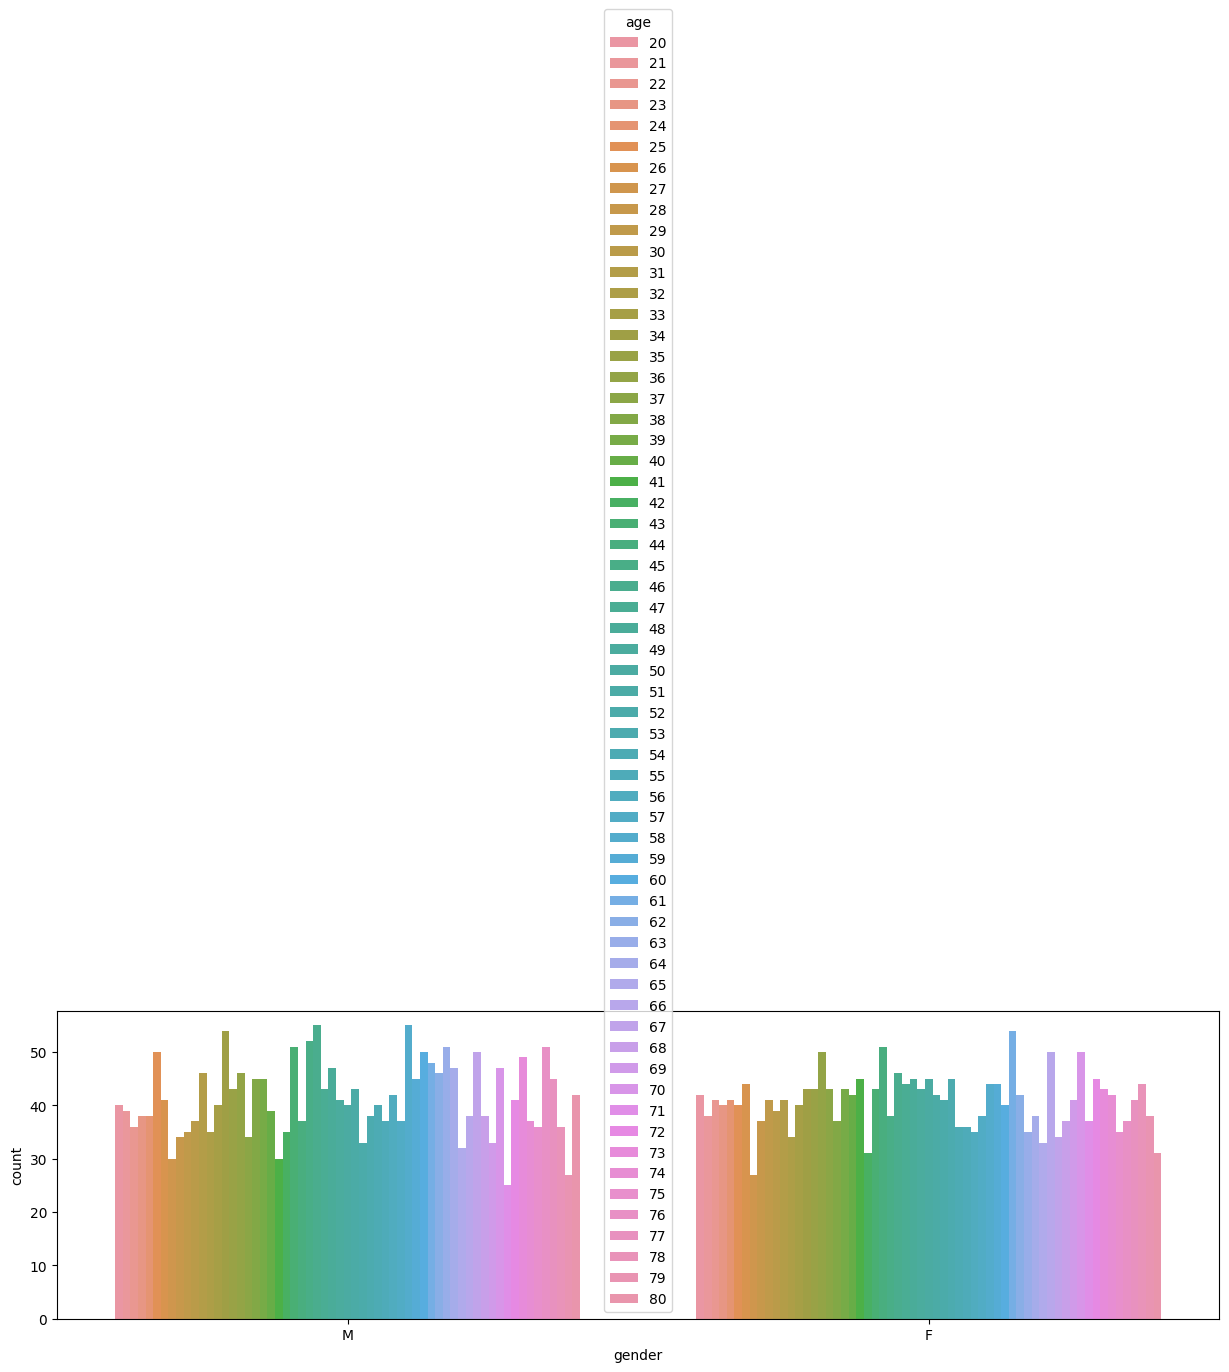

In [99]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='gender',hue='age')

In [100]:
df.groupby('pref')['age'].mean()    # 지역에 따른 나이 평균

pref
광주광역시    48.941799
대구광역시    50.166667
대전광역시    49.806618
부산광역시    49.394993
서울특별시    50.396980
울산광역시    51.437173
인천광역시    50.257014
Name: age, dtype: float64

<Axes: xlabel='pref', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*

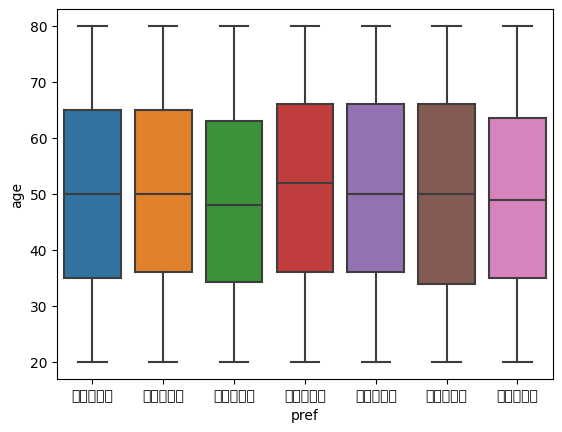

In [103]:
sns.boxplot(data=df, x='pref',y='age')

In [ ]:
# pandas 의 문자열 처리
#  벡터화 연산을 지원

In [105]:
text_tesst=pd.Series(['sky','blue','erath','happy'])
text_tesst.str.upper()  # lower()

0      SKY
1     BLUE
2    ERATH
3    HAPPY
dtype: object

In [106]:
text_tesst # 원본에영향을 미치지 않음

0      sky
1     blue
2    erath
3    happy
dtype: object

In [107]:
text_tesst.str.len()

0    3
1    4
2    5
3    5
dtype: int64

In [111]:
text_tesst.str.startswith('e')

0    False
1    False
2     True
3    False
dtype: bool

In [110]:
text_tesst.str.split('a')   # 데이터를 리스트로 표현

0       [sky]
1      [blue]
2    [er, th]
3    [h, ppy]
dtype: object

In [112]:
# 정규 표현식(regular expression) :어떤 언어에서든 동일
text_tesst.str.extract('([A-Da-d]+)',expand=False)  #A~D ,a~d 까지 추출
    #           추출,    []선택 (+)반복

0    NaN
1      b
2      a
3      a
dtype: object

In [113]:
text_tesst.str.extract('([A-Fa-f]+)',expand=False)

0    NaN
1      b
2      e
3      a
dtype: object

In [115]:
# str 문자열함수, 정규표현식 사용함수
text_tesst=text_tesst.str.upper()
text_tesst.str.findall(r'^[^AEIOUS].*[^aeiou]$') # ^선두, $ 말미, [^]제외하고(AEIOUS를 제외하고)
#regular expression=r(해석방식)  .* 연속이되다가,      aeiou로 끝나지 않은것

0         []
1     [BLUE]
2         []
3    [HAPPY]
dtype: object

In [116]:
text_tesst=text_tesst.str.lower()
text_tesst.str[0:3] # 인덱스 012 만 표현해라

0    sky
1    blu
2    era
3    hap
dtype: object

In [117]:
import re # 파이썬 코어에서 사용하는 정규표현식
text='문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다. 123-222-2222'
# d=숫자(digit), {횟수}
# \=> d와 정규표현식의 d를 구분하기 위해 사용 : 패턴을 찾기위해
# 숫자3번반복 대쉬 후 3번 대쉬후 4번
regex=re.compile(r'(\d{3})-(\d{3}-\d{4})')  # 패턴을 생성
matchobj=regex.search(text)
print(matchobj) # 고유포맷
phonenumber=matchobj.group()    #첫번쨰 것만
print(phonenumber)

<re.Match object; span=(10, 22), match='032-232-3245'>
032-232-3245


In [125]:
# 문제) 나누어진 번호를 032-232-3245 형태로 출력하시오
pd.Series(matchobj).map(lambda x:'-'.join(x))


0    032-232-3245
1    123-222-2222
dtype: object

In [126]:
s=pd.Series(['대한_민국_만세'])
s.str.split('_')

0    [대한, 민국, 만세]
dtype: object

In [130]:
# \t =탭 공백 ( \n\n\n\n\n\n\t\t\t\n)
text='foo   bar\t   baz \tquz'
regex=re.compile(r'\s+')    # \s: 문자열, \S: 문자가 아닌것
                # 문자가 연속되는 것을 찾아라
print("데이터 검색",regex.findall(text))
print("데이터 분할 검색",regex.split(text))

데이터 검색 ['   ', '\t   ', ' \t']
데이터 분할 검색 ['foo', 'bar', 'baz', 'quz']


In [134]:
s=pd.Series(['대한_민국_만세'])
s.str.split('_'," ")

<ipython-input-134-6938abb0dd4c>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  s.str.split('_'," ")


0   NaN
dtype: float64

In [293]:
a=s.to_numpy()
type(a)
a

array(['대한_민국_만세'], dtype=object)

In [135]:
data={'Dave':'isdslba@naver.com','Steve':'steve@gmail.com','Rob':'rob','Wes':np.nan}
# 정상메일만 추출
data=pd.Series(data)
print(data)

Dave     isdslba@naver.com
Steve      steve@gmail.com
Rob                    rob
Wes                    NaN
dtype: object


In [136]:
pattern=r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]'    # r=> \을 이스케이프가 아닌 문자열 자체로 인식하게 함
matches=data.str.match(pattern, flags=re.IGNORECASE)
print("매치결과",matches)

매치결과 Dave      True
Steve     True
Rob      False
Wes        NaN
dtype: object


In [145]:
matches=data.str.findall(pattern, flags=re.IGNORECASE)
print("findall 결과 : \n",matches)

findall 결과 : 
 Dave     [isdslba@naver.c]
Steve      [steve@gmail.c]
Rob                     []
Wes                    NaN
dtype: object


In [144]:
matches=data.str.extractall('([a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z])', flags=re.IGNORECASE)
print("extractall 결과 : \n",matches)

extractall 결과 : 
                            0
      match                 
Dave  0      isdslba@naver.c
Steve 0        steve@gmail.c


In [147]:
df= pd.DataFrame(np.random.randn(3,2), columns=['Column A','Colums B'],
                 index=range(3))
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['Column A', 'Colums B'], dtype='object')]

In [163]:
# 열 이름 대상
# 문제) 컬럼이름의 공백을 제거하시오(strip)
# 모두 소문자로 변환(lower)
# 문자열사이 공백은 _로 대체(replace)
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
df


,column_a,colums_b
0,-1.054636,1.046796
1,-0.176617,-1.590320
2,1.103138,-0.011086


In [164]:
df['column_a']

0   -1.054636
1   -0.176617
2    1.103138
Name: column_a, dtype: float64

In [165]:
# 문제)
sqldate=pd.Series(['2014-0-1','2015-10-10','1990-23-2'])
pdf=pd.Series(['2014.pdf','2015.pdf','1999.pdf'])
df=pd.DataFrame({'sqldate':sqldate,'pdf':pdf})
df
# 년도를 비교환 결과를 newcol하는 필드에 추가하시오

,sqldate,pdf
0,2014-0-1,2014.pdf
1,2015-10-10,2015.pdf
2,1990-23-2,1999.pdf


In [169]:
df['newcol']=df['sqldate'].str[:4]==df['pdf'].str[:4]
df['newcol']=df['sqldate'].str.slice(0,4)==df['pdf'].str.slice(0,4)

,sqldate,pdf,newcol
0,2014-0-1,2014.pdf,True
1,2015-10-10,2015.pdf,True
2,1990-23-2,1999.pdf,False


In [174]:
# 문제)
# 글자를 카운트해서 length 필드에추가
df=pd.DataFrame({'text':['한글','미국','일본?']})
df['length']=df['text'].str.len()
df

,text,length
0,한글,2
1,미국,2
2,일본?,3


In [175]:
df['length']=df['text'].map(len)
df

,text,length
0,한글,2
1,미국,2
2,일본?,3


In [183]:
# ages데이터를 bins를구간으로 해서 구간 범주화 하시오
# 도수 분포표 작성
ages=[20,22,25,27,21,24,37,31,61,45,41,32]
bins=[18,25,35,60,100]

df=pd.DataFrame

#df['Category'] = pd.cut(df['Values'], bins=bins, labels=labels)
#df=pd.DataFrame(data=ages,bins.cut)
#df
#df['group']=pd.qcut(df.value,10, labels=labels) # 등분

AttributeError: ignored

In [192]:
import pandas
import numpy as np
import re
# pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)


In [191]:
cats=pd.cut(ages,bins)      # (나눌대상,경계값)
print("범주화한 데이터",cats)   # 레이블은 자동으로
print('code',cats.codes)        # 구간값 번호
print("범주의 종류는",cats.categories)  #카테고리
print("범주별로 카운트 한 결과",pd.value_counts(cats))

범주화한 데이터 [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
code [0 0 0 1 0 0 2 1 3 2 2 1]
범주의 종류는 IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')
범주별로 카운트 한 결과 (18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [196]:
# 시각화
# 한글화 !
!apt-get update -qq #패키지를 새로운버전, update(같은패키지버전)
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 글꼴
fe=fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic') #패밀리이름(글꼴 사이즈별로 존재)
fm.fontManager.ttflist.insert(0,fe)
# rc=resource configuration
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})       # <- 이걸로 추후에 글꼴 사이즈 조정

In [ ]:
# 상태기반(plt 이용)/ 무상태기반(figure,axes 도화지: 조절해서 찍음)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


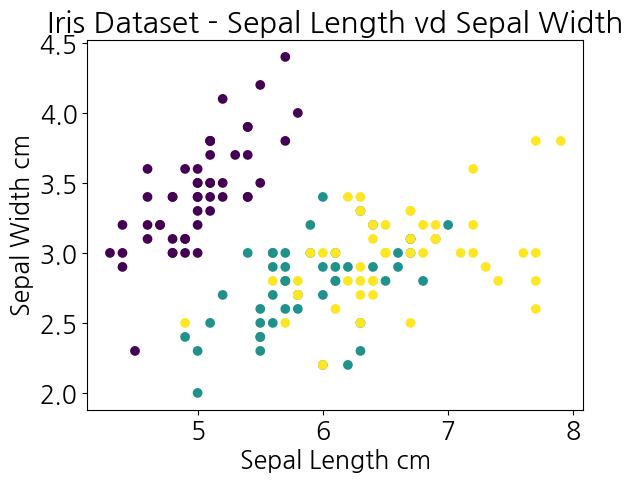

In [202]:
from sklearn import datasets
iris=datasets.load_iris()   # data, feature_names, target, target_names
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df['species']=iris_df['target'].map({i:species for i,
                                          species in enumerate(iris.target_names)})
print(iris_df.head())
# 2개 축
# 1개만 주는경우:count(y축)
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],c=iris_df['target'])   # c=color
plt.xlabel('Sepal Length cm')   # 축 제목
plt.ylabel('Sepal Width cm')
plt.title('Iris Dataset - Sepal Length vd Sepal Width')
plt.show()

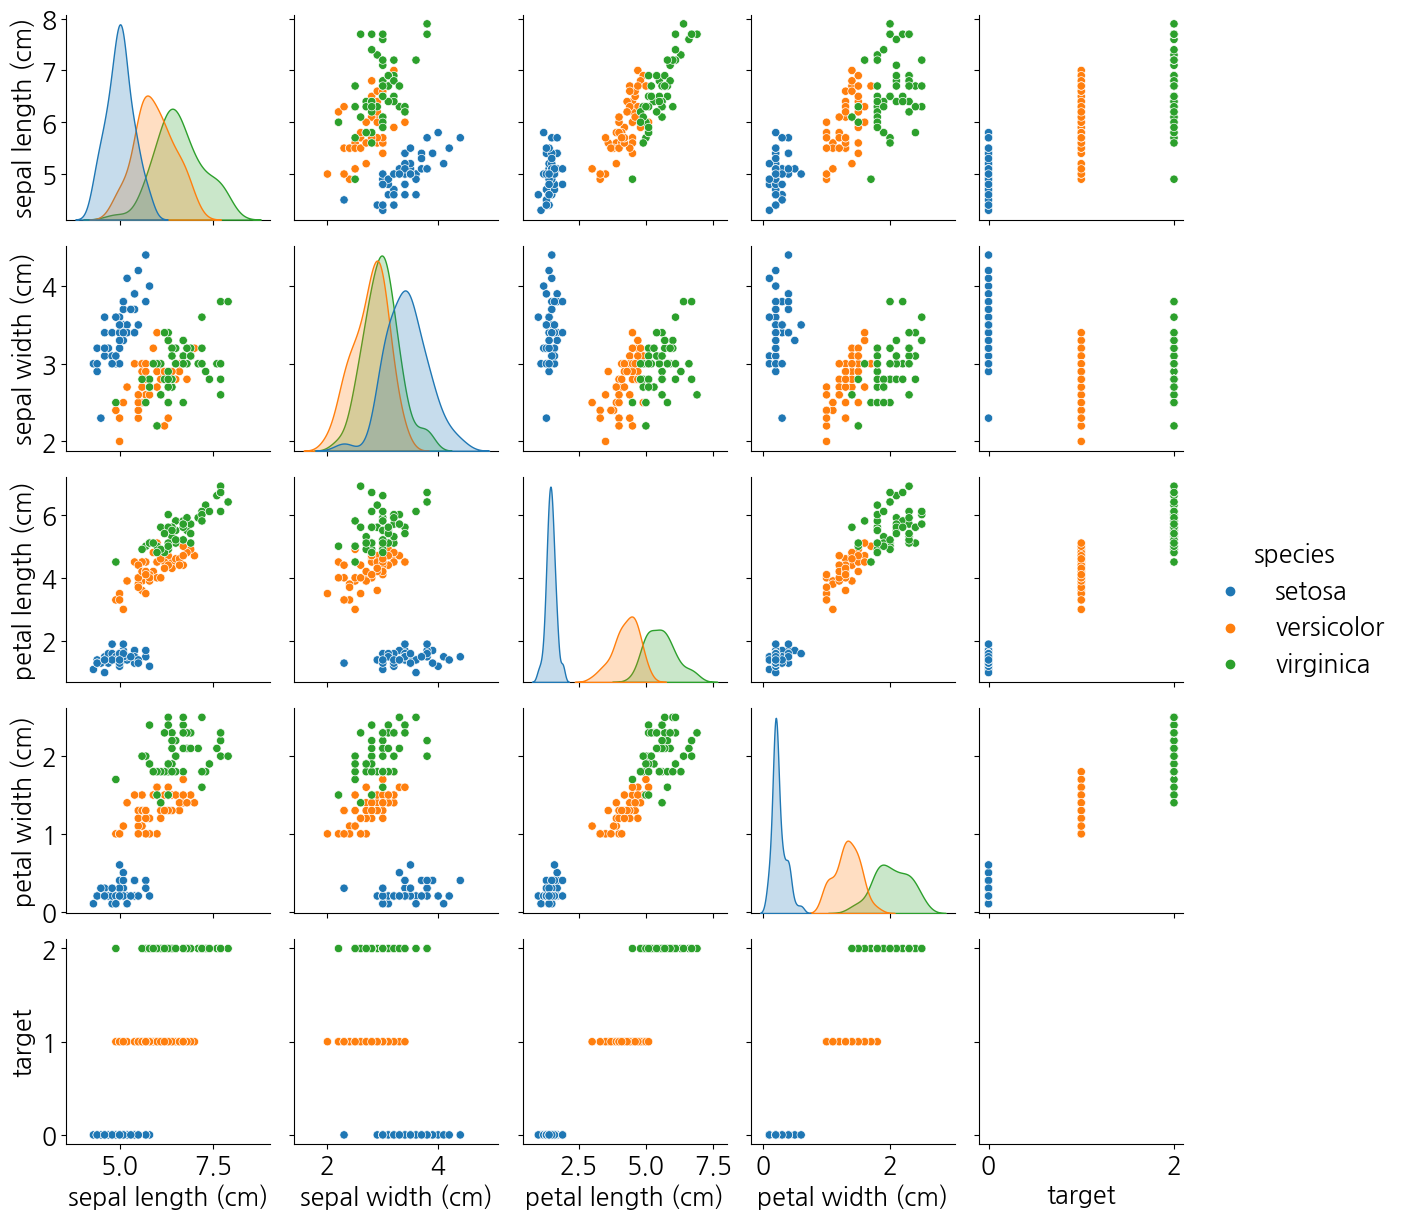

In [203]:
import seaborn as sns
sns.pairplot(iris_df,hue='species')
plt.show()

In [205]:
# dashbord : 프로젝트 웹에서 시각화
# matplotlib:백그라운드
import plotly.express as px
fig=px.scatter(iris_df, x='sepal length (cm)',y='sepal width (cm)',color='species')
fig.show()

In [206]:
pd.options.plotting.backend='plotly'

In [208]:
pd.options.plotting.backend='matplotlib'

2002-09-22   -0.137629
2002-09-23   -0.943149
2002-09-24    0.618296
2002-09-25   -1.169670
2002-09-26    0.012411
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



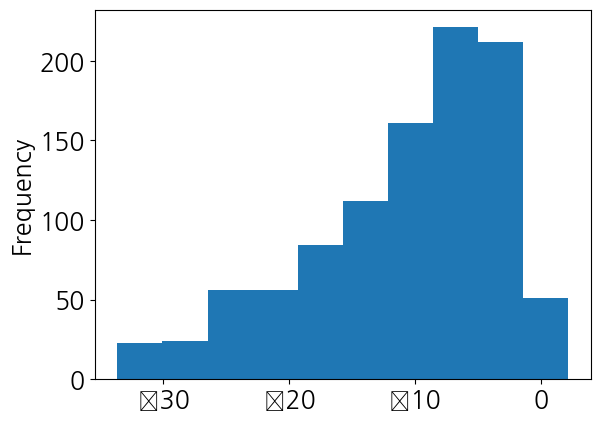

In [219]:
# to_datetime (시간->문자열로)와 date_range(시작으로 해서 구간값을 n개)
# 3년 정도의 기간을 생성
# noraml: 정규분포
#
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
print(ts.tail())
ts=ts.cumsum()  # cumulavie sum 누적합: 이동평균선
ts.plot(kind='kde')    # bar, barh, kde, hist, box, pie,
#h= horizental수평 , # hist= bins를 결정하고 카운트
plt.show()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



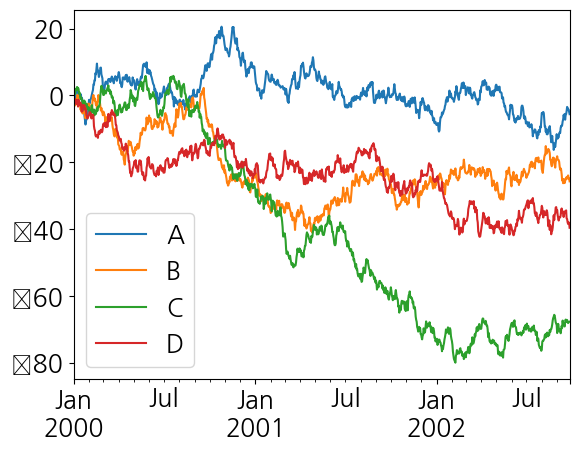

In [220]:
df=pd.DataFrame(np.random.randn(1000,4),
                index=ts.index,columns=list("ABCD"))    # 이전에 만들었던 데이터의 인덱스를 가져와 참조가 가능하다
df=df.cumsum()
plt.figure()
df.plot()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



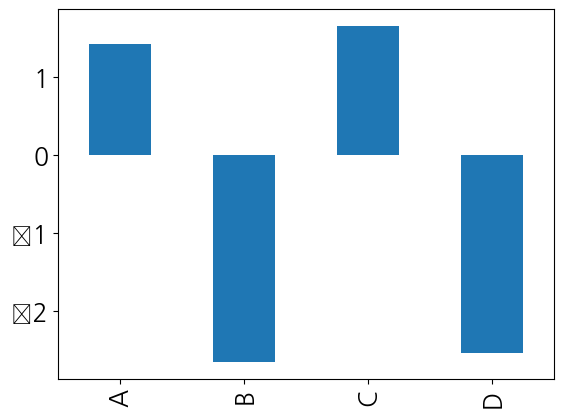

In [222]:
plt.figure();
df.iloc[5].plot(kind='bar');

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



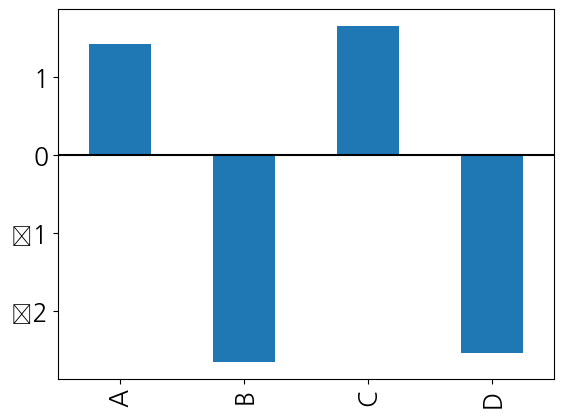

In [224]:
plt.figure();
df.iloc[5].plot.bar();
plt.axhline(0,color='k')    # 수평선을 그려라

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



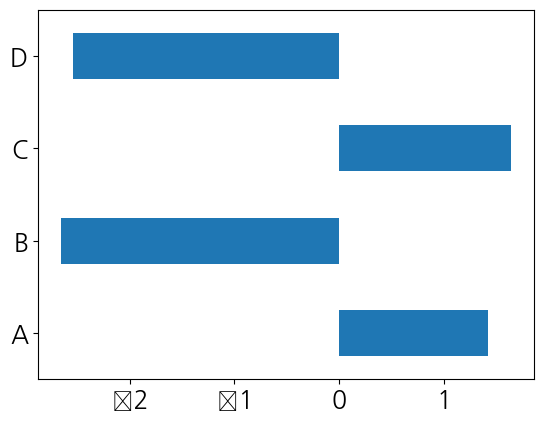

In [225]:
df.iloc[5].plot.barh(stacked=True);

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



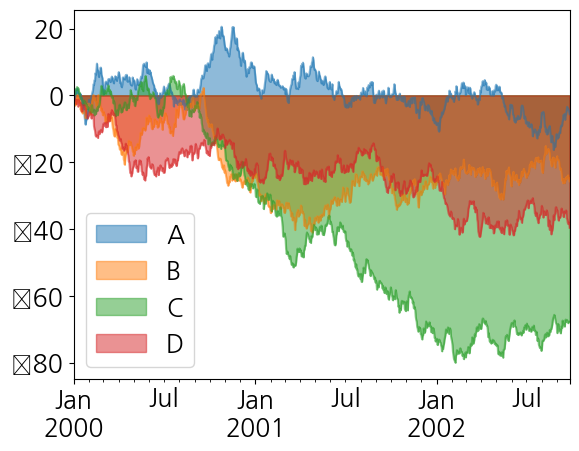

In [226]:
df.plot.area(stacked=False)

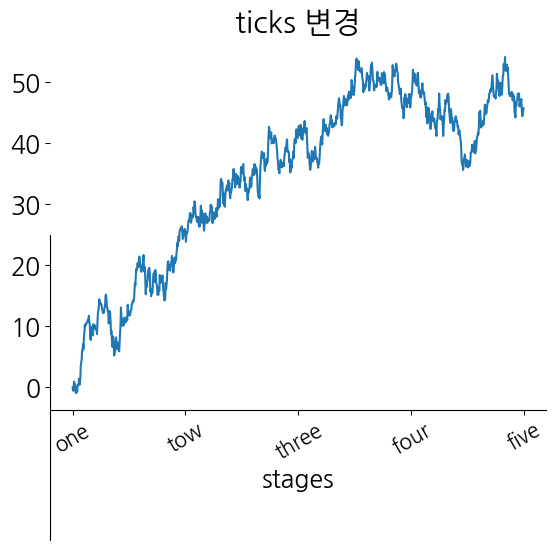

In [238]:
from numpy.random import randn
# 무상태 기반
fig=plt.figure();   # 그래프 객체
ax=fig.add_subplot(1,1,1)       # 화면을 분할(행,열,번호)
# axes(도화지)
ax.plot(randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000]) # 5틱으로 구성
labels=ax.set_xticklabels(['one','tow','three','four','five'],  #레이블도 5개로
                          rotation=30, fontsize='small')    # 30도로 돌림, 길면 옆이랑 부딪혀서
ax.spines['left'].set_bounds(-25,25)    # 구간 값
ax.spines['right'].set_visible(False)   # 보일지 말지 결정
ax.spines['top'].set_visible(False) #위 축
ax.set_title('ticks 변경')
ax.set_xlabel('stages')
plt.show()

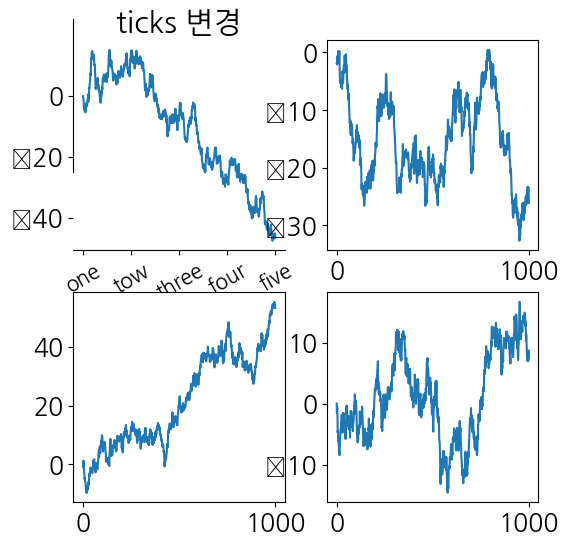

In [244]:
from numpy.random import randn
# 무상태 기반
fig=plt.figure(figsize=[6,6]);   # 그래프 객체
ax=fig.add_subplot(2,2,1)       # 화면을 분할(행,열,번호)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
# axes(도화지)
ax.plot(randn(1000).cumsum())
ax2.plot(randn(1000).cumsum())
ax3.plot(randn(1000).cumsum())
ax4.plot(randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000]) # 5틱으로 구성
labels=ax.set_xticklabels(['one','tow','three','four','five'],  #레이블도 5개로
                          rotation=30, fontsize='small')    # 30도로 돌림, 길면 옆이랑 부딪혀서
ax.spines['left'].set_bounds(-25,25)    # 구간 값
ax.spines['right'].set_visible(False)   # 보일지 말지 결정
ax.spines['top'].set_visible(False) #위 축
ax.set_title('ticks 변경')
ax.set_xlabel('stages')
plt.show()

In [253]:
from scipy.integrate import quad
def func(x):
    return (x-4)*(x-6)*(x-5)+100
a=2 # 구간값
b=9
integral, error=quad(func,a,b) # 구간적분
integral

740.2500000000001

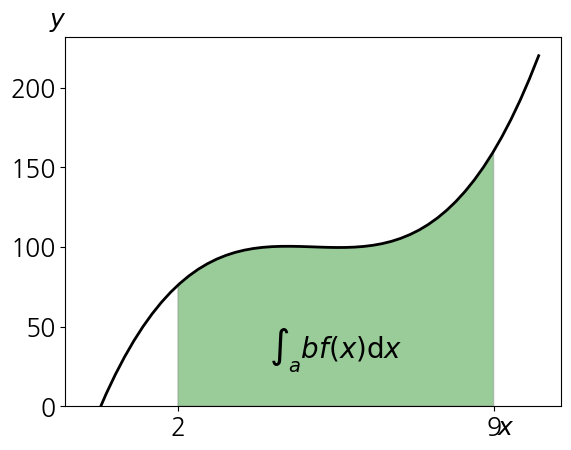

In [249]:
# 적분 면적을 낼떄
from matplotlib.patches import Polygon
def func(x):    # 3차 방정식-> (방적식을 구하기 위해)면적 적분
    return (x-4)*(x-6)*(x-5)+100

a,b=2,9
x=np.linspace(0,10) # 직선에서 숫자를 만들어주는 것
y=func(x)   # 결과값을 y로만듬
fig,ax=plt.subplots()
ax.plot(x,y,'k',linewidth=2)
ax.set_ylim(bottom=0)
ix=np.linspace(a,b)
iy=func(ix)
verts=[(a,0),*zip(ix,iy),(b,0)]
# 폐다각형, 끝이 닫혀야함
poly=Polygon(verts, facecolor='green',
             edgecolor='0.5',alpha=0.4)
ax.add_patch(poly)  # patch 면
# Tex 마크업 언어 $사이에 쓰이는 것$ : integral 적분
# 특별한의미 :
ax.text(0.5*(a+b),30,
        r"$\int_a ^ b f(x)\mathrm{d}x$",
        horizontalalignment = 'center',
        fontsize=20)
fig.text(0.8,0.05, '$x$')
fig.text(0.1, 0.9, '$y$')
ax.set_xticks((a,b))
plt.show()

Text(0, 0.5, 'f(X)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



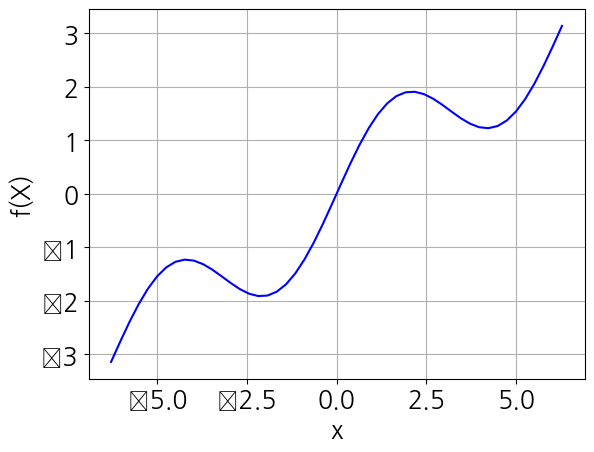

In [254]:
# 합성함수  sin함수 + 1차방정식
# sin(x)+(y=ax+b)
def f(x):
    return np.sin(x) + 0.5 *x

x= np.linspace(-2* np.pi, 2*np.pi,50) # -360 ~ 360
plt.plot(x, f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(X)')

Text(0, 0.5, 'f(x)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



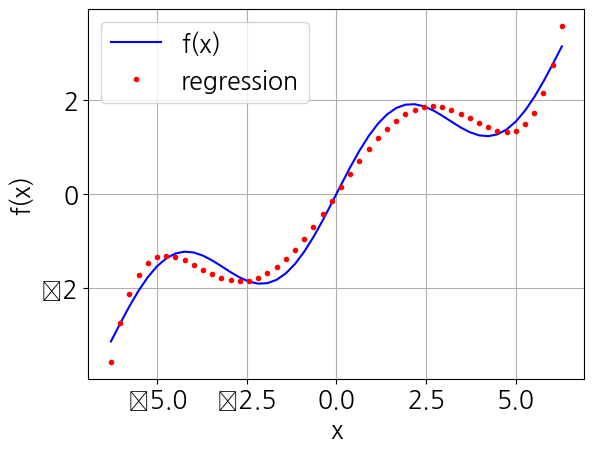

In [257]:
# 최소제곱법
reg=np.polyfit(x, f(x),deg=5)
ry=np.polyval(reg,x)
plt.plot(x, f(x),'b',label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

데이터개수 (100, 100), X의 요소10000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



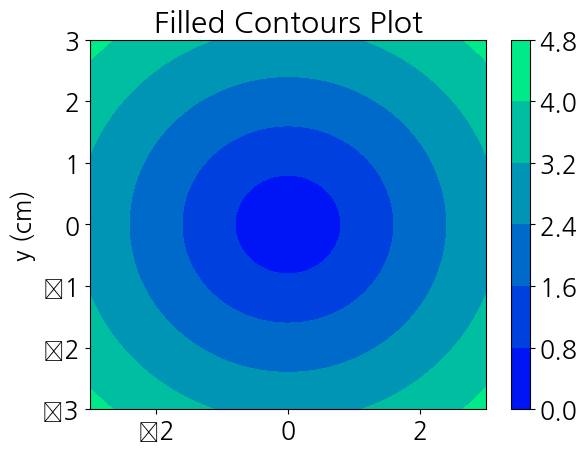

In [264]:
# mesh와 등고선
xlist=np.linspace(-3.0,3.0,100)     #직선에 대해
ylist=np.linspace(-3.0,3.0,100)
X,Y = np.meshgrid(xlist,ylist)      #ogrid
print(f'데이터개수 {len(X), len(Y)}, X의 요소{X.size}')
Z=np.sqrt(X**2+Y**2)            # 높이 값
fig,ax=plt.subplots(1,1)
cp=ax.contourf(X,Y,Z, levels=5, cmap='winter')
fig.colorbar(cp)    #거리값을 컬러로 표현
ax.set_title('Filled Contours Plot') # fill 채워라
ax.set_ylabel('y (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



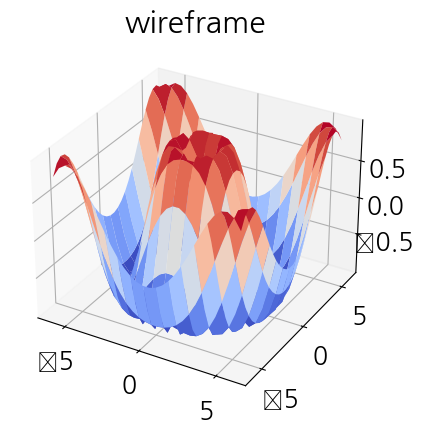

In [268]:
import matplotlib as mpl    #cmap 을 가진 패키지(color map)
def f(x,y): # 거리값이 원형으로 똑같음
    return np.sin(np.sqrt(x**2+y**2))       # 거리값

x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y= np.meshgrid(x,y) #900
Z=f(X,Y)

fig=plt.figure()
ax=plt.axes(projection='3d')    # 도화지를 바로 얻고 있음
#ax.plot_wireframe(X,Y,Z, color='black')
# rstride 빠르게 진행하기 위해 건너뜀
# 화면좌표
# 1024x1024
ax.plot_surface(X,Y,Z, rstride=2,cstride=2, cmap=mpl.cm.coolwarm,
                linewidth=0.5, antialiased=True)    #antialiased선이 부드러워지게
ax.set_title('wireframe')
plt.show()

In [270]:
# 문제) 데이터 로딩후
# 1) 첫번쨰 컬럼의 이름을 ID-area로 지정하시오
# 2) regions의 값들을 중복핮 ㅣ않고 몇개의 범주인지 확인하시오 (unique())
# 3) area도 위와 같이 처리하시오
# 4) 처음컬럼에(ID_area) 에 들어온 이상한 숫자를 제거하시오
# 5) 산성관련성분인 ;palmitic','palmitoleic','stearic','oleic','linoleic','linolenic','linolenic','arachidic','eicosenoic'의 컬럼만 추려
# 별도의 sub 데이터 프레임을 생성하시오 (변수이름 =dfsub) 생성
# 6) dfsub 데이터를 모두 100으로 나누어 소수점으로 나타내시오
df=pd.read_csv('/content/drive/MyDrive/daejeon/olive.csv')
print(df)

           Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0      1.North-Apulia       1     1      1075           75      226   7823   
1      2.North-Apulia       1     1      1088           73      224   7709   
2      3.North-Apulia       1     1       911           54      246   8113   
3      4.North-Apulia       1     1       966           57      240   7952   
4      5.North-Apulia       1     1      1051           67      259   7771   
..                ...     ...   ...       ...          ...      ...    ...   
567  568.West-Liguria       3     8      1280          110      290   7490   
568  569.West-Liguria       3     8      1060          100      270   7740   
569  570.West-Liguria       3     8      1010           90      210   7720   
570  571.West-Liguria       3     8       990          120      250   7750   
571  572.West-Liguria       3     8       960           80      240   7950   

     linoleic  linolenic  arachidic  eicosenoic  
0         672

In [273]:
df.describe()
df.head()

df.rename(columns={'Unnamed: 0':'ID-area'})

KeyError: ignored